# Solutions of self tests
## Lecture 7

The *eng-hun.txt* file is a simple dictionary, each line of which contains two words separated by a tab character. The first is an English word, the second is its Hungarian version.
Create the function "translate" whose first parameter is the name of a file containing the text to be translated, and the second parameter is the dictionary. Print the text in such a way that instead of every word in the dictionary, it prints its Hungarian version.

In [ ]:
!wget -qc https://raw.githubusercontent.com/sze-info/ProgrammingBasics/master/python/lectures/data/prince24.txt
!wget -qc https://raw.githubusercontent.com/sze-info/ProgrammingBasics/master/python/lectures/data/eng-hun.txt
def translate(textFile: str, dictFile: str) -> None:
  engHunDict = {}
  with open(dictFile, 'r') as df:
    for line in df:
      eng, hun = line.split()
      engHunDict[eng] = hun
  separators = '\r\n\t .,;!?—”“'
  word = ''
  with open(textFile, 'r') as tf:
    for letter in tf.read():
      if letter not in separators:
        word += letter
      else:
        if word.lower() in engHunDict:
          print(engHunDict[word.lower()], end='')
        else:
          print(word, end='')
        word = ''
        print(letter, end='')

translate('prince24.txt', 'eng-hun.txt')

de it történt az utána sétál for a hosszú idő keresztül homok, és rocks, és snow, the little
prince at last came upon a road. és all roads lead to the abodes of men.

“Good morning,” he said. He was standing before a garden, all a-bloom with roses.

“Good morning,” said the roses.

The little prince gazed at them. They all looked like his flower.

“Who are you?” he demanded, thunderstruck.

“We are roses,” the roses said. és he was overcome with sadness. His flower had told him az
she was the only one of her kind in all the universe. és here were five thousand of them, all
alike, in one single garden!

“She would be very much annoyed,” he said to himself, “if she should see az... she would cough
most dreadfully, és she would pretend az she was dying, to avoid being laughed at. és I
should be obliged to pretend az I was nursing her back to life, for if I did not do az, to humble
myself also, she would really allow herself to die...”

Then he went on with his reflections: “I thought az I

Write the function writeDictionary() that reads English - Hungarian word pairs, and stores them in a text file. The words are separated by tab character. The name of the dictionary is passed to the function.

In [ ]:
def writeDictionary(dictFile: str) -> None:
  dict = {}
  while True:
    eng = input('English word: ')
    if eng == '':
      break
    hun = input('Hungarian word: ')
    dict[eng] = hun
  with open(dictFile, 'w') as f:
    for eng in dict:
      hun = dict[eng]
      f.write(f'{eng}\t{hun}\n')

writeDictionary('myDict.txt')

English word: little
Hungarian word: kicsi
English word: jó
Hungarian word: good
English word: nap
Hungarian word: day
English word: 


The [birth.csv](https://raw.githubusercontent.com/sze-info/ProgrammingBasics/master/python/lectures/data/birth.csv) file contains two columns: the first one contains the name of someone, the second his/her birth year. Ask the user for the current year, read every lines of the file and print the ages of people.

As an advanced version, you can get the current year from the operating system using the [datetime](https://docs.python.org/3/library/datetime.html) module.

In [12]:
!wget -qc https://raw.githubusercontent.com/sze-info/ProgrammingBasics/master/python/lectures/data/birth.csv
import csv
currentYear = int(input('What year is it today? '))
with open('birth.csv') as f:
  birth = list(csv.reader(f))
  for name, birthYear in birth:
    print(f'{name} is {currentYear-int(birthYear)} years old today.')

What year is it today? 2023
Hazel is 34 years old today.
Jackson is 22 years old today.
Willow is 30 years old today.
Hudson is 40 years old today.
Ivy is 1 years old today.
Colton is 24 years old today.
Audreay is 57 years old today.
Jameson is 36 years old today.
Lyla is 52 years old today.
Everett is 15 years old today.


Write a function that saves the first *n* rows of [Pascal's triangle](https://en.wikipedia.org/wiki/Pascal%27s_triangle) in a CSV file!

In [11]:
import csv

def pascal(filename, n=8):
  with open(filename, 'w') as f:
    csvWriter = csv.writer(f)
    previous = []
    for level in range(1, n+1):
      numbers = [1]
      for i in range(1, level-1):
        numbers.append(previous[i-1] + previous[i])
      if level >= 2:
        numbers.append(1)
      for i in range(level+1, n+1):
        numbers.append('')
      csvWriter.writerow(numbers)
      previous = numbers

pascal('pascal.csv')
!cat pascal.csv

1,,,,,,,
1,1,,,,,,
1,2,1,,,,,
1,3,3,1,,,,
1,4,6,4,1,,,
1,5,10,10,5,1,,
1,6,15,20,15,6,1,
1,7,21,35,35,21,7,1


Even if [Biorhythm](https://en.wikipedia.org/wiki/Biorhythm_(pseudoscience)) is a pseudoscience, it is a good exercise to draw the chart of rhytmic cycles of the first 66 days of a human.

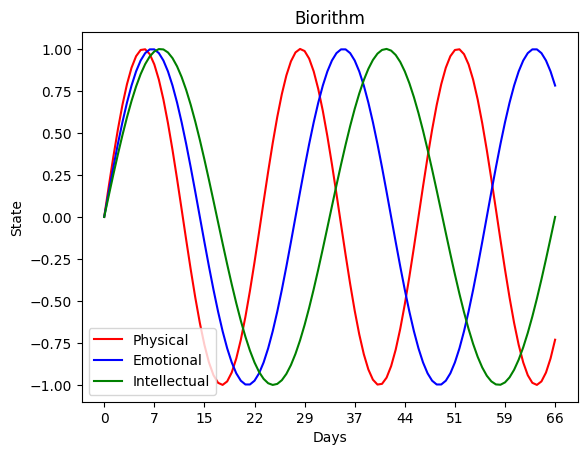

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math
fig, ax = plt.subplots()
ax.set_title("Biorithm")
ax.set_xlabel("Days")
ax.set_ylabel("State")
DAYS = 66
PHYSICAL_CYCLE = 23
EMOTIONAL_CYCLE = 28
INTELLECTUAL_CYCLE = 33
PRECISION = 100
x = [(x/(PRECISION-1))*(2.*math.pi*DAYS) for x in range(PRECISION)]
physical = [math.sin(xi/PHYSICAL_CYCLE) for xi in x]
emotional = [math.sin(xi/EMOTIONAL_CYCLE) for xi in x]
intellectual = [math.sin(xi/INTELLECTUAL_CYCLE) for xi in x]
ax.plot(x, physical, label="Physical", color="red")
ax.plot(x, emotional, label="Emotional", color="blue")
ax.plot(x, intellectual, label="Intellectual", color="green")
ax.set_xticks([xi/(PRECISION/10-1)*(2.*math.pi*DAYS) for xi in range(PRECISION//10)])
ax.set_xticklabels([f"{xi/(PRECISION/10-1)*DAYS:.0f}" for xi in range(PRECISION//10)])
ax.legend();